# k-Fold Cross Validation

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset= pd.read_csv('Social_Network_Ads.csv')
X= dataset.iloc[:, :-1].values
y= dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

## Training the Kernel SVM model on the Training set

In [5]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf', random_state=0)
svc.fit(X_train, y_train)

SVC(random_state=0)

## Making the Confusion Matrix

In [6]:
y_pred= svc.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55  3]
 [ 1 21]]


0.95

## Applying k-Fold Cross Validation

In [8]:
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= svc, X=X_train, y=y_train, cv=10)
print('Accuracy: {:.2f}'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}'.format(accuracies.std()*100))

Accuracy: 90.00
Standard Deviation: 4.80


## Visualising the Training set results

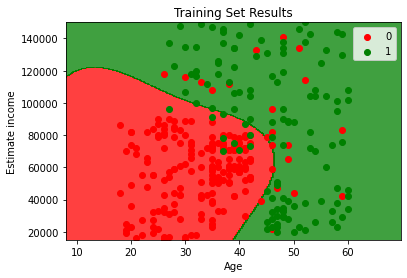

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set= sc.inverse_transform(X_train), y_train
X1, X2= np.meshgrid( np.arange(start= X_set[:, 0].min()-10, stop= X_set[:, 0].max()+10, step=0.25),
                    np.arange(start= X_set[:, 1].min()-10, stop= X_set[:, 1].max()+10, step=0.25))
plt.contourf( X1, X2, svc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha=0.75,
  cmap= ListedColormap(('red', 'green')) )

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Training Set Results')
plt.xlabel('Age')
plt.ylabel('Estimate income')
plt.legend()
plt.show()

## Visualising the Test set results

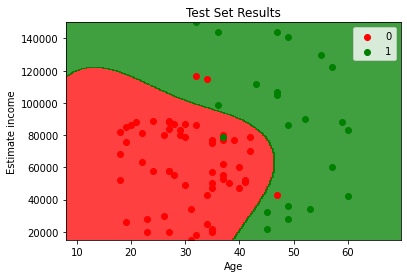

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set= sc.inverse_transform(X_test), y_test
X1, X2= np.meshgrid( np.arange(start= X_set[:, 0].min()-10, stop= X_set[:, 0].max()+10, step=0.25),
                    np.arange(start= X_set[:, 1].min()-10, stop= X_set[:, 1].max()+10, step=0.25))
plt.contourf( X1, X2, svc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha=0.75,
  cmap= ListedColormap(('red', 'green')) )

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Test Set Results')
plt.xlabel('Age')
plt.ylabel('Estimate income')
plt.legend()
plt.show()